In [11]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings('ignore')
import re
import csv
import os
import re
import itertools
from collections import Counter
from fpdf import FPDF

In [12]:
def extract_method_name(signature):
    method_full_name = signature.split('(')[0]
    method_name = method_full_name.split('.')[-1]
    return method_name

In [23]:
# Name of the CSV file
file_name = 'revList.csv'

# List to store the DataFrames
found_files = []

# Open the CSV file for reading
with open(file_name, mode='r', newline='', encoding='utf-8') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file, delimiter=';')
    
    # Skip the first line (header)
    next(csv_reader)
    cont = 0
    # Read the remaining lines and process each line
    for row in csv_reader:
        project = row[0]
        merge_commit = row[1]
        class_name = row[2]
        method = row[3]
        # left_modification = row[4]
        # has_build = row[5]
        # left_deletion = row[6]
        # right_modification = row[7]
        # right_deletion = row[8]
        # realistic_case_path = row[9]

        # Generate path
        parts = class_name.split('.')
        class_name = parts.pop()
        class_path = '.'.join(parts).replace(".", "/")
        method_name = extract_method_name(method)
        
        path_file = f"joana/reports/{project}/{merge_commit}/{class_path}/{class_name}/{method_name}/executionSummary.csv"
        
        if os.path.exists(path_file):
            try:
                df = pd.read_csv(path_file, sep=';')
                # Add context columns to the DataFrame
                df['project'] = project
                df['merge commit'] = merge_commit
                df['class'] = class_name
                df['original method'] = method

            except:
                print(f"Error: The file '{path_file}' is empty.")
                data = {
                'project': project,
                'merge commit': merge_commit,
                'class': class_name,
                'original method': [method]
                }
                
                df = pd.DataFrame(data)

        else:
            print(path_file)
            cont+=1
            data = {
                'project': project,
                'merge commit': merge_commit,
                'class': class_name,
                'original method': [method]
            }
            
            df = pd.DataFrame(data)
        print(df.columns)
        # Reorder columns to have new columns at the beginning
        columns_order = ['project', 'merge commit', 'class', 'original method'] + [col for col in df.columns if col not in ['project', 'merge commit', 'class', 'original method']]
        df = df[columns_order]
        found_files.append(df)

    print("Não existem", cont)
    # Check if there are DataFrames to concatenate
    if len(found_files) > 0:
        # Concatenate all DataFrames, keeping all rows and columns
        merged_file = pd.concat(found_files, ignore_index=True, sort=False)

        merged_file = merged_file.drop(columns=['Method'])

        # Save the result to a new CSV file with ';' as separator
        merged_file.to_csv('merged_file.csv', index=False, sep=';')
        print("Files merged successfully! File saved as 'merged_file.csv'.")
    else:
        print("No file was found!")


joana/reports/druid/05168808c278c080c59c19e858d9471b316cd1f5/com/metamx/druid/loading/S3SegmentPusher/push/executionSummary.csv
Index(['project', 'merge commit', 'class', 'original method'], dtype='object')
Index(['Method', ' Precision', ' Exceptions', ' SdgCreated', ' CgNodes',
       ' CgEdges', ' SdgNodes', ' SdgEdges', ' Time (ms)', ' Memory (M)',
       ' HasSourcedAndSink', ' HasLeftToRightVio', ' HasRightToLeftVio',
       ' TotalVios', ' InstVios', ' LineVios', ' DetailedLineVios', ' Left',
       ' Right', 'project', 'merge commit', 'class', 'original method'],
      dtype='object')
Index(['Method', ' Precision', ' Exceptions', ' SdgCreated', ' CgNodes',
       ' CgEdges', ' SdgNodes', ' SdgEdges', ' Time (ms)', ' Memory (M)',
       ' HasSourcedAndSink', ' HasLeftToRightVio', ' HasRightToLeftVio',
       ' TotalVios', ' InstVios', ' LineVios', ' DetailedLineVios', ' Left',
       ' Right', 'project', 'merge commit', 'class', 'original method'],
      dtype='object')
Index(['M

Reading analyses execution results...
Generating results...
Colunas: Index(['project', 'merge commit', 'class', 'original method', 'Precision',
       'Exceptions', 'SdgCreated', 'CgNodes', 'CgEdges', 'SdgNodes',
       'SdgEdges', 'Time (ms)', 'Memory (M)', 'HasSourcedAndSink',
       'HasLeftToRightVio', 'HasRightToLeftVio', 'TotalVios', 'InstVios',
       'LineVios', 'DetailedLineVios', 'Left', 'Right'],
      dtype='object')
Colunas:  ['druid', 'S3SegmentPusher', 'DataSegment com.metamx.druid.loading.S3SegmentPusher.push(File, DataSegment)', '05168808c278c080c59c19e858d9471b316cd1f5']
DataSegment com.metamx.druid.loading.S3SegmentPusher.push(File, DataSegment)
Colunas:  ['netty', 'LengthFieldBasedFrameDecoder', 'Object org.jboss.netty.handler.codec.frame.LengthFieldBasedFrameDecoder.decode(ChannelHandlerContext, Channel, ChannelBuffer)', '193acdb36cd3da9bfc62dd69c4208dff3f0a2b1b']
Object org.jboss.netty.handler.codec.frame.LengthFieldBasedFrameDecoder.decode(ChannelHandlerContext, 

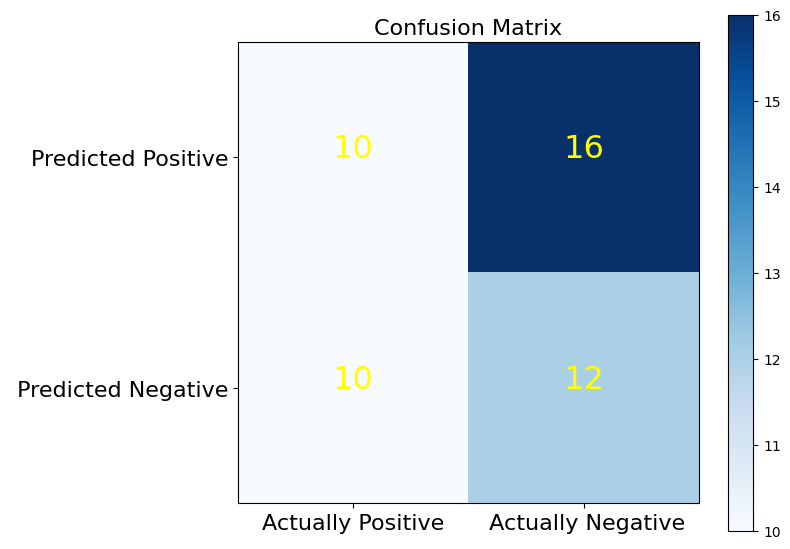

In [24]:
class ReportAnalysis:

    def __init__(self, path_result, path_ground_truth):
        self.soot_results = pd.read_csv(path_result, sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
        self.loi = pd.read_csv(path_ground_truth, sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)

        self.generate_results()

    def get_method_name(self, method_declaration):
        match = re.search(r'\.([a-zA-Z_][a-zA-Z0-9_]*)\(', method_declaration)
        if match:
            method_name = match.group(1)
            print("Method name:", method_name)
        else:
            print("Method name not found.")

    def get_loi(self, project, class_name, method, merge_commit):
        df = pd.read_csv("LOI.csv", delimiter=';')
        print(method)
        # Encontrar o índice do ponto final e do parêntese
        dot_index = method.rfind('.')
        paren_index = method.find('(')

        method_name = ""

        # Extrair o nome do método
        if dot_index != -1 and paren_index != -1:
            method_name = method[dot_index + 1:paren_index]

        value_LOI = ("", "")
        
        for project_l, class_name_l, method_l, merge_commit_l, LOI, original_sample in zip(
            df['Project'], 
            df['Class Name'], 
            df['Method or field declaration changed by the two merged branches'], 
            df['Merge Commit'], 
            df['Locally Observable Interference'],
            df['Original Sample'],
        ):
            if (project_l == project and 
                class_name in class_name_l  and 
                method_name in method_l and 
                merge_commit_l == merge_commit):
                
                value_LOI = (LOI, original_sample)

                break  # Para parar no primeiro match encontrado

        return value_LOI

    def calculate_matrix_loi(self, columns):
        results = []
        loi_list = []
        original_sample_list = []
        info_LOI = ['project', 'class', 'original method', 'merge commit']
        
        # Limpar espaços em branco nos nomes das colunas
        self.soot_results.columns = self.soot_results.columns.str.strip()
        print("Colunas:", self.soot_results.columns)
        for index, row in self.soot_results.iterrows():
            value = row['HasSourcedAndSink']
                    
            values_LOI = [row[column] for column in info_LOI if column in row]
            print("Colunas: ", values_LOI)
            (loi_actual, original_sample) = self.get_loi(*values_LOI)
            
            loi_list.append(loi_actual)
            original_sample_list.append(original_sample)

            result = "-"
            # Determinar o resultado
            if "Yes" in str(value) and "Yes" in loi_actual:
                result = "TRUE POSITIVE"
            elif "No" in str(value) and "No" in loi_actual:
                result = "TRUE NEGATIVE"
            elif "No" in str(value) and "Yes" in loi_actual:
                result = "FALSE NEGATIVE"
            elif "Yes" in str(value) and "No" in loi_actual:
                result = "FALSE POSITIVE"
            
            results.append(result)
            
        df = pd.read_csv('merged_file.csv', sep=';')
        df['LOI'] = loi_list
        df['Original Sample'] = original_sample_list
        df['result'] = results

        # Salvar o novo DataFrame em um novo arquivo CSV
        new_csv_path = 'results.csv'
        df.to_csv(new_csv_path, sep=';', index=False)

        return results

    def generate_results(self):

        print("Generating results...")

        FP,TP, FN, TN = 0, 0, 0, 0

        list_columns = self.soot_results.columns.tolist()

        result_matrix = self.calculate_matrix_loi(list_columns)

        for elem, count in Counter(result_matrix).items():
            if (elem == 'FALSE POSITIVE'):
                FP = count
            if (elem == 'FALSE NEGATIVE'):
                FN = count
            if (elem == 'TRUE POSITIVE'):
                TP = count
            if (elem == 'TRUE NEGATIVE'):
                TN = count

        sensitivity = 0 if ((TP + FN) == 0) else (TP / (TP + FN))
        precision = 0 if ((TP + FP) == 0) else (TP / (TP + FP))
        f1_score = 0 if ((2*TP + FP + FN) == 0) else (2*TP / (2*TP + FP + FN))
        accuracy = 0 if ((FP + TP + TN + FN) == 0) else ((TP + TN) / (FP + TP + TN + FN))

        df = pd.read_csv("results.csv", sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
       
        fail_results = df['result'].eq("-").sum()
        total = len(df)

        # variable pdf
        pdf = FPDF()

        # add a page
        pdf.add_page()

        # set style and size of font
        # that you want in the pdf
        pdf.set_font("Arial", size = 15)

        # create a cell
        pdf.cell(200, 10, txt = "Results for execution",
                 ln = 1, align = 'C')
    
        pdf.cell(200, 10, txt = ("Precision: "+str(round(precision, 2))),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("Recall: "+str(round(sensitivity, 2))),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("F1 Score: "+str(round(f1_score, 2))),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("Accuracy: "+str(round(accuracy, 2))),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("False Positives: "+str(FP)),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("False Negatives: "+str(FN)),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("True Positives: "+str(TP)),
                 ln = 2, align = 'L')

        pdf.cell(200, 10, txt = ("True Negatives: "+str(TN)),
                 ln = 2, align = 'L')
        
        pdf.cell(200, 10, txt = (f"Total produzed: {total-fail_results} out of {total} units"),
                 ln = 2, align = 'L')

        cm = np.array([[TP,  FP], [FN, TN]])
        normalize = False
        target_names = ['Actually Positive', ' Actually Negative']
        target_names2 = ['Predicted Positive', ' Predicted Negative']
        title = "Confusion Matrix"

        cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, fontsize=16)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, fontsize=16)
            plt.yticks(tick_marks, target_names2, fontsize=16)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="yellow" if cm[i, j] > thresh else "black", fontsize=23)
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="yellow" if cm[i, j] > thresh else "black", fontsize=23)
        plt.tight_layout()

        plt.savefig("confusion_matrix.jpg")

        pdf.image("confusion_matrix.jpg", x = None, y = None, w = 160, h = 110, type = 'jpg', link = 'confusion_matrix.jpg')

        # Save the pdf with name .pdf
        pdf.output("results.pdf")
        # pdf.output("results.pdf")

        print("Results in results.pdf")

path_ground_truth = "LOI.csv"
path_result = 'merged_file.csv'

print("Reading analyses execution results...")

ReportAnalysis(path_result, path_ground_truth)

#project, class_name, method, merge_commit
#Colunas:  ['druid', 'S3SegmentPusher', '05168808c278c080c59c19e858d9471b316cd1f5']



In [25]:

path_result = 'merged_file.csv'

print("Reading analyses execution results...")
soot_results = pd.read_csv(path_result, sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)

soot_results.columns = soot_results.columns.str.strip()
list_time_seconds = []

for index, row in soot_results.iterrows():
    value = row['Time (ms)']
    try:
        # Ignora valores que não são numéricos, como ' -'
        if str(value) not in ['', '-', 'NaN', 'nan']:
            list_time_seconds.append(float(value) / 1000)
    except ValueError:
        continue
       
print(list_time_seconds)


Reading analyses execution results...
[21348.974, 100.579, 26803.017, 90.523, 477.295, 477.295, 86.424, 12111.004, 16307.385, 164.854, 3263.51, 107.059, 96.957, 38084.959, 822.349, 2230.173, 385.715, 91.636, 88.886, 20662.537, 373.994, 17702.926, 62096.918, 110039.556, 94.52, 102.778, 102.778, 3213.311, 3425.11, 2935.97, 3404.508, 91.999, 88.851, 104.78, 104.78, 104.78, 5810.294, 7253.081, 5558.994, 84.81, 54853.537, 1338.891, 91.161, 1991.138, 96.273, 84.869, 374.23, 239.341]


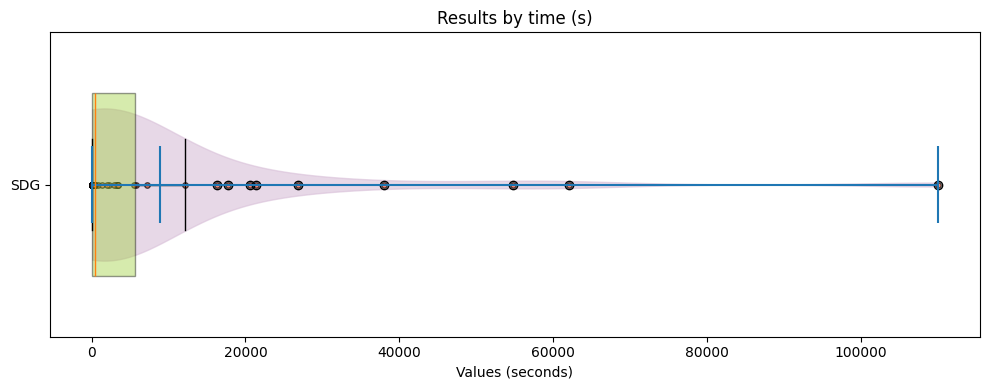

In [26]:
import random

# Exemplo de classe que utiliza a função plot_by_variable
class Plotter:
    def __init__(self):
        pass

    def plot_by_variable(self, leg1, leg_x, time_list1):
        # Define o tamanho da figura
        fig, ax = plt.subplots(figsize=(10, 4))

        # Dados
        data_x = [time_list1]

        # Cores para os gráficos
        boxplot_color = 'yellowgreen'
        violin_color = 'thistle'
        scatter_color = 'tomato'

        # Boxplot
        bp = ax.boxplot(data_x, patch_artist=True, vert=False, positions=[1], widths=0.6)
        for patch in bp['boxes']:
            patch.set_facecolor(boxplot_color)
            patch.set_alpha(0.4)

        # Violinplot
        vp = ax.violinplot(data_x, points=500, showmeans=True, showextrema=True, showmedians=False, vert=False)
        for b in vp['bodies']:
            b.set_color(violin_color)
            b.set_alpha(0.6)

        # Scatterplot
        features = data_x[0]
        y = np.full(len(features), 1)  # Usando apenas 1 para a posição no eixo Y
        jitter = np.random.uniform(low=-0.1, high=0.1, size=len(features))
        ax.scatter(features + jitter, y, s=15, c=scatter_color, alpha=0.7, edgecolor='k')

        # Configurações do gráfico
        ax.set_yticks([1])
        ax.grid(False)
        ax.set_yticklabels([leg1])
        ax.set_xlabel(leg_x)
        ax.set_title("Results by time (s)")
        plt.tight_layout()
        plt.savefig("rain_cloud_time_sdg.jpg", dpi=300)
        plt.show()

    
# Criar uma instância da classe ExamplePlotter
plotter = Plotter()

# Nome da variável a ser plotada
y = "SDG"
x = "Values (seconds)"

# Chamar a função para plotar o gráfico
plotter.plot_by_variable(y, x, list_time_seconds)

#time_list = [random.uniform(0.5, 3.5) for _ in range(100)]
#plotter.plot_by_variable(y, x, time_list)


In [27]:
import statistics

def converter_segundos(tempo_em_segundos):
    horas = int(tempo_em_segundos // 3600)
    minutos = int((tempo_em_segundos % 3600) // 60)
    segundos = tempo_em_segundos % 60
    return horas, minutos, segundos

tempo_em_segundos = max(list_time_seconds)
horas, minutos, segundos = converter_segundos(tempo_em_segundos)

print(f"{horas} horas, {minutos} minutos e {segundos:.3f} segundos")

30 horas, 33 minutos e 59.556 segundos


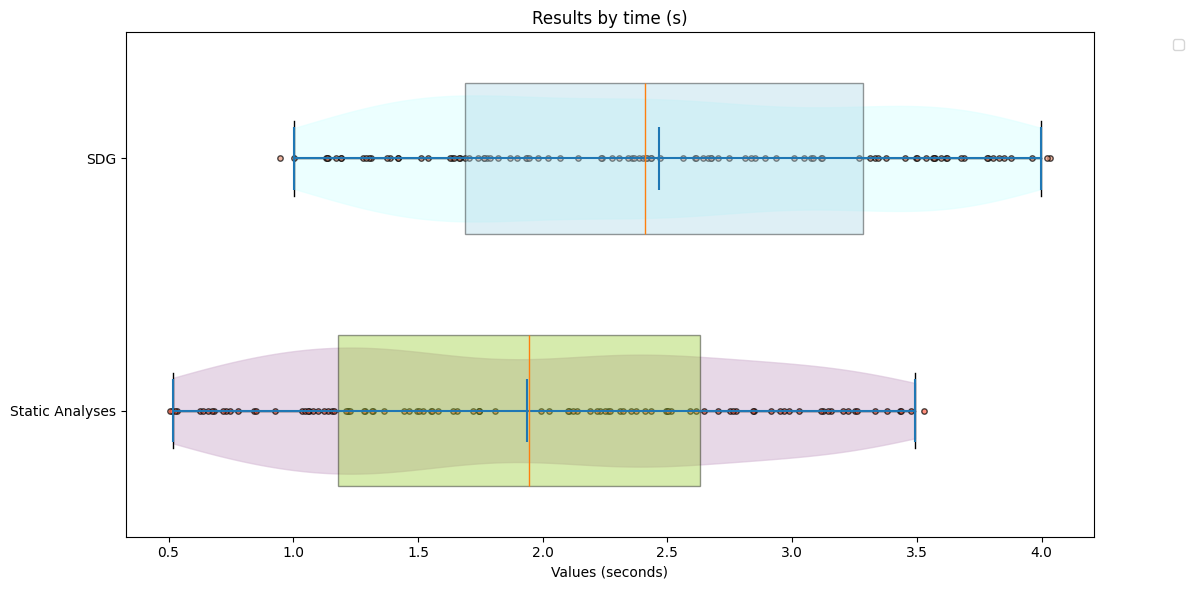

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de classe que utiliza a função plot_by_variable
class Plotter:
    def __init__(self):
        pass

    def plot_by_variable(self, leg1, leg2, leg_x, time_list1, time_list2):
        # Define o tamanho da figura
        fig, ax = plt.subplots(figsize=(12, 6))

        # Dados
        data_x = [time_list1, time_list2]

        # Cores para os gráficos
        boxplots_colors = ['yellowgreen', 'lightblue']
        violin_colors = ['thistle', 'lightcyan']
        scatter_colors = ['tomato', 'darksalmon']

        # Boxplot
        bp = ax.boxplot(data_x, patch_artist=True, vert=False, positions=[1, 2], widths=0.6)
        for patch, color in zip(bp['boxes'], boxplots_colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.4)

        # Violinplot
        vp = ax.violinplot(data_x, points=500, showmeans=True, showextrema=True, showmedians=False, vert=False)
        for idx, b in enumerate(vp['bodies']):
            b.set_color(violin_colors[idx])
            b.set_alpha(0.6)

        # Scatterplot
        for idx, features in enumerate(data_x):
            y = np.full(len(features), idx + 1)
            jitter = np.random.uniform(low=-0.1, high=0.1, size=len(features))
            ax.scatter(features + jitter, y, s=15, c=scatter_colors[idx], alpha=0.7, edgecolor='k')

        # Configurações do gráfico
        ax.set_yticks([1, 2])
        ax.grid(False)
        ax.set_yticklabels([leg1, leg2])
        ax.set_xlabel(leg_x)
        ax.set_title("Results by time (s)")
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
        plt.tight_layout()
        plt.savefig("rain_cloud_time_sdg_sam.jpg", dpi=300)
        plt.show()

       
# Criar uma instância da classe Plotter
plotter = Plotter()

# Gerar duas listas de tempos de exemplo (em segundos)
random.seed(42)  # Para reprodutibilidade
time_list1 = [random.uniform(0.5, 3.5) for _ in range(100)]
time_list2 = [random.uniform(1.0, 4.0) for _ in range(100)]

# Nome da variável a ser plotada
variable = "Execution Time"

# Chamar a função para plotar o gráfico
plotter.plot_by_variable("Static Analyses", "SDG", "Values (seconds)", time_list1, time_list2)


In [38]:
import pandas as pd

# Caminhos dos arquivos CSV
file1 = 'errors.csv'  # Substitua pelo caminho do arquivo 1
file2 = 'revList_errors.csv'  # Substitua pelo caminho do arquivo 2

df1 = pd.read_csv(file1)  # Substitua ',' por ';' ou '\t' conforme necessário
df2 = pd.read_csv(file2, delimiter=';')

# Realiza o merge com base nas colunas 'method' e 'original method'
merged_df = pd.merge(df1, df2, left_on='original method', right_on='method')

# Salva o resultado em um novo arquivo CSV, se necessário
merged_df.to_csv('merged_errors.csv', index=False)


In [48]:
import pandas as pd
import re

# Função para extrair o nome do método
def get_method_name(method_declaration):
    match = re.search(r'\.([a-zA-Z_][a-zA-Z0-9_]*)\(', method_declaration)
    if match:
        return match.group(1)
    return None

# Caminhos dos arquivos CSV
file1 = 'errors.csv'  # Arquivo com a coluna 'original method'
file2 = 'revList_errors.csv'  # Arquivo com a coluna 'method', separado por ';'

# Leitura do arquivo errors.csv com uma única coluna chamada 'original method'
df1 = pd.read_csv(file1, names=['original method'], skiprows=1)

# Extração dos nomes dos métodos
df1['method_name'] = df1['original method'].apply(get_method_name)

# Leitura do arquivo revList_errors.csv, separado por ';'
df2 = pd.read_csv(file2, delimiter=';')

# Criar uma função para verificar substring e retornar a linha correspondente ou NaN
def find_matching_row(method_name, df2):
    for _, row in df2.iterrows():
        if method_name in row['method']:
            return row
    return pd.Series(index=df2.columns)  # Retorna NaN para todas as colunas se não encontrar correspondência

# Aplicar a função linha por linha no df1
matched_rows = df1['method_name'].apply(lambda x: find_matching_row(x, df2))

# Concatenar as colunas originais do df1 com as informações do df2
result = pd.concat([df1, matched_rows], axis=1)

# Selecionar apenas as colunas desejadas
columns_to_keep = [
    'project', 'merge commit', 'className', 'method',
    'left modifications', 'has_build', 'left deletions',
    'right modifications', 'right deletions'
]
filtered_result = result[columns_to_keep]

# Salvar o resultado em um novo arquivo CSV com separador ';'
filtered_result.to_csv('filtered_merged_errors.csv', sep=';', index=False)


In [41]:
df1['method_name'].head

<bound method NDFrame.head of 0                                 push
1            adjustPipelineToWebSocket
2                    getMethodCallback
3                                 open
4                     KafkaSpoutConfig
5                emitTupleIfNotEmitted
6                              execute
7                     createConnection
8                              execute
9                     copyWithDefaults
10             handleConnectionFailure
11             handleConnectionClosure
12                               Faker
13             getSchemaFromAnnotation
14                           Bootstrap
15                               start
16                  getInstanceJanitor
17              BasicSimianArmyContext
18                 HdfsFileInputStream
19                VoldemortClientShell
20                             connect
21                       parseSettings
22                   assignCollections
23                       parseSettings
24         applyAdvancedTransforma

In [42]:
df2['method'].head()

0    DataSegment com.metamx.druid.loading.S3Segment...
1    Object org.jboss.netty.handler.codec.frame.Len...
2    boolean org.opentripplanner.routing.spt.MultiS...
3     void org.webbitserver.netty.WebSocketClient.a...
4    String org.fusesource.restygwt.rebind.DirectRe...
Name: method, dtype: object